In [1]:
import mnist 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
train_img=mnist.train_images()[0:1000]
train_lbs=mnist.train_labels()[0:1000]
test_img=mnist.test_images()[0:1000]
test_lbs=mnist.test_labels()[0:1000]

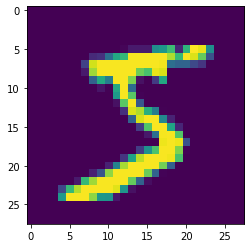

In [3]:
plt.imshow(train_img[0]) 

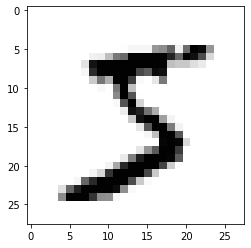

In [4]:
plt.imshow(train_img[0],plt.get_cmap("Greys")) # get_cmap for changing the colour scale

In [5]:
train_img[0].shape

(28, 28)

In [6]:
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D,Flatten

In [7]:
model=Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))#convolution layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))#Maxpooling layer
model.add(layers.Conv2D(64,(2,2),activation='relu'))#Maxpooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))#Maxpooling layer
model.add(layers.Flatten())#fully connected layer
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
train_lbs.dtype

dtype('uint8')

In [9]:
#converting to categorical data type
train_lbs=tf.keras.utils.to_categorical(train_lbs)
test_lbs=tf.keras.utils.to_categorical(test_lbs)

In [10]:
train_img.dtype

dtype('uint8')

In [11]:
train_img.shape

(1000, 28, 28)

In [12]:
train_img=train_img.reshape(1000,28,28,1) # reshaping to add colour dimension
test_img=test_img.reshape(1000,28,28,1) 

In [13]:
train_img.shape

(1000, 28, 28, 1)

In [14]:
train_img=train_img.astype('float32')/255 
test_img=test_img.astype('float32')/255# changing the dtype of train_img and dividing by 255 to flatten the data

In [15]:
train_img.dtype

dtype('float32')

In [16]:
model.fit(train_img,train_lbs,epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 21ms/step - loss: 1.5797 - accuracy: 0.5500
Epoch 2/10
32/32 [==============================] - 1s 26ms/step - loss: 0.5810 - accuracy: 0.8250
Epoch 3/10
32/32 [==============================] - 1s 22ms/step - loss: 0.4015 - accuracy: 0.8730
Epoch 4/10
32/32 [==============================] - 1s 20ms/step - loss: 0.2802 - accuracy: 0.9180
Epoch 5/10
32/32 [==============================] - 1s 21ms/step - loss: 0.2136 - accuracy: 0.9350
Epoch 6/10
32/32 [==============================] - 1s 22ms/step - loss: 0.1509 - accuracy: 0.9610
Epoch 7/10
32/32 [==============================] - 1s 21ms/step - loss: 0.1252 - accuracy: 0.9650
Epoch 8/10
32/32 [==============================] - 1s 37ms/step - loss: 0.0847 - accuracy: 0.9770
Epoch 9/10
32/32 [==============================] - 1s 26ms/step - loss: 0.0709 - accuracy: 0.9790
Epoch 10/10
32/32 [==============================] - 1s 23ms/step - loss: 0.0384 - accuracy: 0.9900


In [17]:
model.evaluate(test_img,test_lbs)

32/32 [==============================] - 0s 7ms/step - loss: 0.2054 - accuracy: 0.9300


[0.20541201531887054, 0.9300000071525574]

In [18]:
model.evaluate(train_img,train_lbs)

32/32 [==============================] - 0s 8ms/step - loss: 0.0245 - accuracy: 0.9980


[0.02449595369398594, 0.9980000257492065]